In [12]:
import numpy as np

import pylab as plt

from numpy import log10 
from numpy import exp

In [13]:
plt.style.use('default')
plt.rc('font', family='serif')

In [14]:
#Solar mass
sm = 1.98847e30

#Hubble constant (km/s/Mpc)
H = 67.8

#Reduced Hubble constant
h = H/100

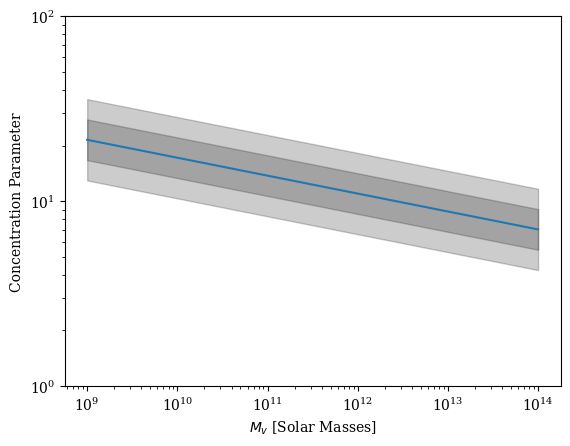

In [20]:
#m-log10(c) relation
def lmcrel(mv):
    return 1.025 - 0.097*log10(mv/(sm*1e12/h))

mx = np.linspace(1e9, 1e14, 10000)

s = 0.11

lcs = lmcrel(mx*sm)

plt.loglog(mx, 10**lcs)

plt.ylim(1, 100)

plt.fill_between(mx, 10**(lcs - s), 10**(lcs + s), color='k', alpha=0.2, zorder=0)
plt.fill_between(mx, 10**(lcs - 2*s), 10**(lcs + 2*s), color='k', alpha=0.2, zorder=0)
plt.ylabel(r'Concentration Parameter')
plt.xlabel(r'$M_v$ [Solar Masses]')
plt.show()

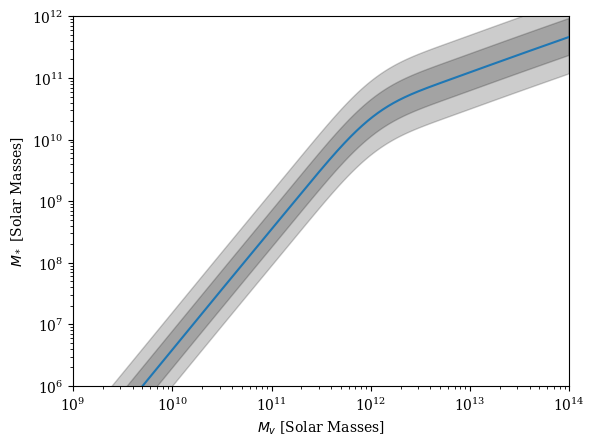

In [19]:
sp = 0.3

#abundance matching
def labm(mv):
    epsi = -1.466
    lm1 = 12.013
    x = log10(mv) - lm1
    alpha = 1.965
    gamma = 10**(-0.937)
    delta = 0.411
    beta = 0.564
    return epsi - log10(10**(-alpha * x) + 10**(-beta * x)) \
+ gamma*exp(-0.5 * (x/delta)**2) + lm1

logabm = labm(mx)

plt.loglog(mx, 10**logabm)

plt.fill_between(mx, 10**(logabm - sp), 10**(logabm + sp), color='k', alpha=0.2, zorder=0)
plt.fill_between(mx, 10**(logabm - 2*sp), 10**(logabm + 2*sp), color='k', alpha=0.2, zorder=0)
plt.ylim(1e6, 1e12)
plt.xlim(1e9, 1e14)
plt.ylabel(r'$M_*$ [Solar Masses]')
plt.xlabel(r'$M_v$ [Solar Masses]')
plt.show()
